In [1]:
import shutil, random, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [83]:
erppath="/home/sultan/EEG/Source_Level_Analysis/Grand_ERPs/"
nhc="NH_clear_grand_erp_v1.csv"
nhn="NH_noise_grand_erp_v1.csv"
hic="HI_clear_grand_erp_v1.csv"
hin="HI_noise_grand_erp_v1.csv"
dkpath="/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv"

In [3]:
# datnhc =pd.read_csv(erppath+nhc)
# dnhc=datnhc.iloc[:,1:]
# datnhn =pd.read_csv(erppath+nhn)
# dnhn=datnhn.iloc[:,1:]
# dathic =pd.read_csv(erppath+hic)
# dhic=dathic.iloc[:,1:]
# dathin =pd.read_csv(erppath+hin)
# dhin=dathin.iloc[:,1:]

In [84]:
dkr=pd.read_csv(dkpath)
rois=[40,48,49,67]
leg=['lPT','lPRC','rPRC','rTRANS']

/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:937: UserWarning: Legend does not support '1' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


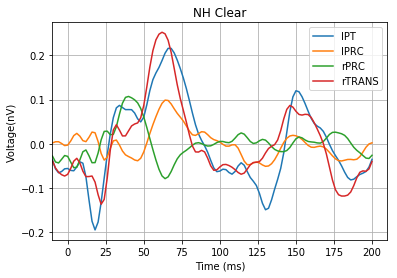

In [5]:
datnhc =pd.read_csv(erppath+nhc)
dnhc=datnhc.iloc[:,1:]
t=np.linspace(-10,200,106)
# plt.plot(t,dnhc.iloc[[36,37,40,41,48,49,66,67],:].values.T*1e9/count)
# plt.plot(t,dnhc.iloc[[36,40,48,66,67],:].values.T*1e9)
plt.plot(t,dnhc.iloc[rois,:].values.T*1e9)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("NH Clear")
plt.legend('1','2')
plt.legend(leg)
plt.show()

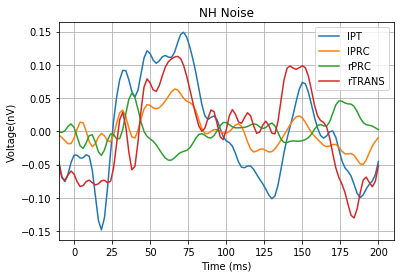

In [6]:
datnhn =pd.read_csv(erppath+nhn)
dnhn=datnhn.iloc[:,1:]
t=np.linspace(-10,200,106)
# plt.plot(t,dnhn.iloc[[36,40,48,66,67],:].values.T*1e9)
# plt.plot(t,dnhn.iloc[[36,40,48,66],:].values.T*1e9)
# plt.plot(t,dnhn.iloc[[36,37,40,41,48,49,66,67],:].values.T*1e9/count)
plt.plot(t,dnhn.iloc[rois,:].values.T*1e9)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("NH Noise")
# plt.legend(['lPOP','lPT','lPRC','lTRANS','rTRANS'])
plt.legend(leg)
plt.show()

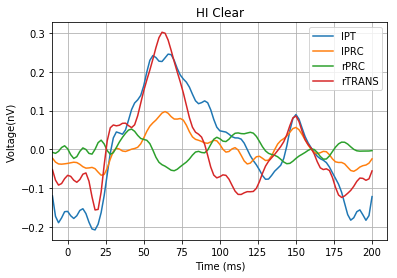

In [7]:
dathic =pd.read_csv(erppath+hic)
dhic=dathic.iloc[:,1:]
t=np.linspace(-10,200,106)
# plt.plot(t,dhic.iloc[[36,37,40,41,48,49,66,67],:].values.T*1e9/count)
# plt.plot(t,dhic.iloc[[36,40,48,66,67],:].values.T*1e9)
plt.plot(t,dhic.iloc[rois,:].values.T*1e9)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("HI Clear")
plt.legend(leg)
plt.show()

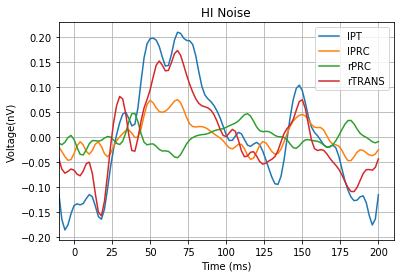

In [8]:
dathin =pd.read_csv(erppath+hin)
dhin=dathin.iloc[:,1:]
t=np.linspace(-10,200,106)
# plt.plot(t,dhin.iloc[[36,37,40,41,48,49,66,67],:].values.T*1e9/count)
# plt.plot(t,dhin.iloc[[36,40,48,66],:].values.T*1e9)
plt.plot(t,dhin.iloc[rois,:].values.T*1e9)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("HI Noise")
plt.legend(leg)
plt.show()

# Statistical analysis:

In [14]:
from scipy.stats.stats import pearsonr

In [50]:
nhc=dnhc.iloc[rois,:].values.T*1e9
hic=dhic.iloc[rois,:].values.T*1e9
# pr=pearsonr(nhc[:,], hic[:,i])
# pr
for i in range(0,4):
    pr=pearsonr(nhc[:,i], hic[:,i])
    prs=pearsonr(nhc[:,i], nhc[:,i])
    print 'pearson:',pr,'mean:', np.mean(nhc[:,i]), np.mean(hic[:,i]), 'std',np.std(nhc[:,i]), np.std(hic[:,i])
#     print "Same"
#     print 'pearson:',prs,'mean:', np.mean(nhc[:,i]), np.mean(nhc[:,i]), 'std',np.std(nhc[:,i]), np.std(nhc[:,i])

pearson: (0.8176382413136362, 1.098381366797751e-26) mean: 5.9885832820317185e-05 0.00033406199417232126 std 0.09582780931196196 0.13143761224094785
pearson: (0.735344757094011, 2.8178657839386843e-19) mean: -4.3896177024460535e-05 2.9711876471828658e-05 std 0.03404809137953371 0.04113733324351288
pearson: (0.6729610824128411, 2.754260420986908e-15) mean: 0.0001450978466600219 8.376171814967482e-06 std 0.036911651882576064 0.025366558683278598
pearson: (0.9412515705449067, 7.694990379212938e-51) mean: 7.648382676286862e-05 0.00013249319401755934 std 0.09007094469467389 0.11169398369136056


In [51]:
from scipy import stats

In [75]:
t2, p2 = stats.ttest_ind(nhc[:,1], nhc[:,2])
print t2, p2

-0.03856491209109736 0.9692739141695051


In [78]:
nhc[:,1]

array([ 0.00191925,  0.00445829,  0.0045901 ,  0.00063728, -0.00409694,
       -0.00315416,  0.00621891,  0.01840012,  0.02345607,  0.01725891,
        0.00699123,  0.00474435,  0.0145315 ,  0.026366  ,  0.02489324,
        0.00489481, -0.02202973, -0.0369665 , -0.03043106, -0.01022142,
        0.00651456,  0.00834062, -0.00272748, -0.01643872, -0.02513064,
       -0.02900921, -0.03236443, -0.03671451, -0.03852495, -0.03291317,
       -0.01847823,  0.00170318,  0.02309553,  0.04304884,  0.06131614,
        0.07797725,  0.09144769,  0.09877036,  0.0979568 ,  0.09010907,
        0.07911175,  0.0688339 ,  0.06026277,  0.05141751,  0.04039347,
        0.02855176,  0.02025429,  0.01888429,  0.02305106,  0.02719245,
        0.0263805 ,  0.02053711,  0.01371106,  0.00937399,  0.00702656,
        0.00377544, -0.00128949, -0.00539978, -0.00542931, -0.0025081 ,
       -0.0022941 , -0.00989531, -0.02448785, -0.03934151, -0.04744837,
       -0.04726708, -0.04324111, -0.04119874, -0.04347951, -0.04

In [114]:
shdk=dkr['Desikan_Freesurfer_v5.1']
type(shdk)
# shdk.iloc['rFUS']
shdk

0       lBKS
1       rBKS
2       lCAC
3       rCAC
4       ICMF
5       rCMF
6       lCUN
7       rCUN
8       lENT
9       rENT
10       lFP
11       rFP
12      lFUS
13      rFUS
14       lIP
15       rIP
16       lIT
17       rIT
18      lINS
19      rINS
20      lIST
21      rIST
22       lLO
23       rLO
24      lLOF
25      rLOF
26      lLIN
27      rLIN
28      lMOF
29      rMOF
       ...  
38      lPOB
39      rPOB
40       lPT
41       rPT
42     lPERI
43     rPERI
44      lPOC
45      rPOC
46      lPCG
47      rPCG
48      lPRC
49      rPRC
50     lPREC
51     rPREC
52      lRAC
53      rRAC
54      lRMF
55      rRMF
56       ISF
57       rSF
58       lSP
59       rSP
60       lST
61       rST
62    lSUPRA
63    rSUPRA
64       lTP
65       rTP
66    lTRANS
67    rTRANS
Name: Desikan_Freesurfer_v5.1, Length: 68, dtype: object

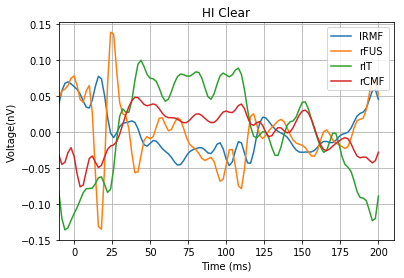

In [117]:
leg=['lRMF','rFUS','rIT','rCMF']
rois1=[54,13,17,5]
plt.plot(t,dhin.iloc[rois1,:].values.T*1e9)
# plt.plot(t,dnhn.iloc[rois1,:].values.T*1e9)
plt.grid(True)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("HI Clear")
plt.legend(leg)
plt.show()

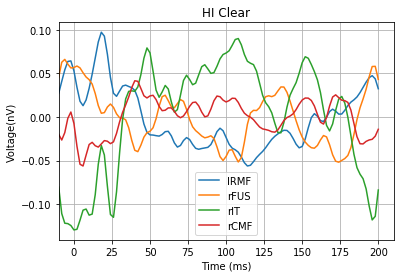

In [118]:
rois1=[54,13,17,5]
plt.plot(t,dnhn.iloc[rois1,:].values.T*1e9)
plt.grid(True)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("HI Clear")
plt.legend(leg)
plt.show()

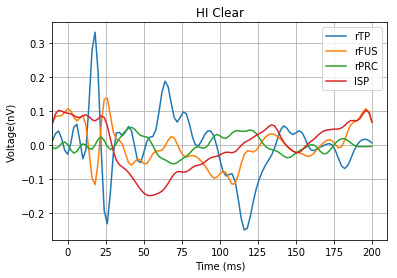

In [122]:
leg=['rTP','rFUS','rPRC','lSP']
roisc1=[65,13,49,58]
plt.plot(t,dhic.iloc[roisc1,:].values.T*1e9)
# plt.plot(t,dnhn.iloc[rois1,:].values.T*1e9)
plt.grid(True)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("HI Clear")
plt.legend(leg)
plt.show()

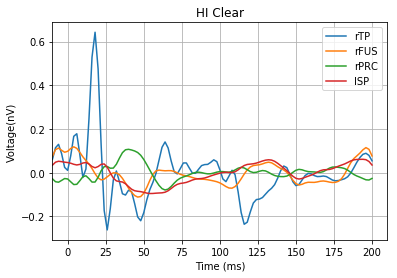

In [121]:
leg=['rTP','rFUS','rPRC','lSP']
roisc1=[65,13,49,58]
plt.plot(t,dnhc.iloc[roisc1,:].values.T*1e9)
# plt.plot(t,dnhn.iloc[rois1,:].values.T*1e9)
plt.grid(True)
plt.xlim(-10, 210)
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage(nV)")
plt.title("HI Clear")
plt.legend(leg)
plt.show()